<a href="https://colab.research.google.com/github/BhushanB16/Linear_Regression_Score_Prediction_model_task_TSF/blob/main/Linear_Regression_Score_Prediction_model_task_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spark Foundation GRIP May 2023**

## **Name: Bhushan Suresh Borse**

## **Data Science & Business Analytics Intern At Spark Foundation**

## **Task-2**
 
## **Problem Statement :** To Predict the percentage of marks of the students based on the number of hours they studied



## **Model used: Linear Regression()**

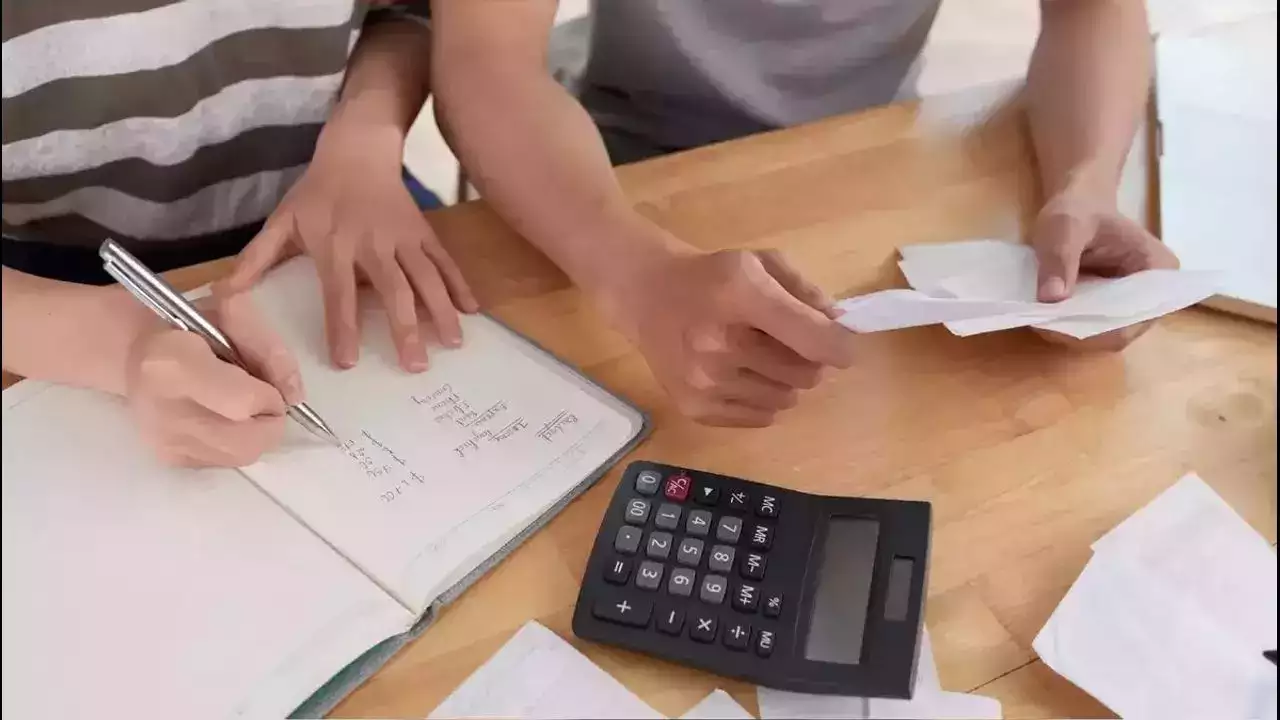

# **Importing Libraries**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing functions from sklearn for model building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
x=link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(link)

# **First look of Data**

In [35]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Data Information**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Data Describe**

In [37]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Checking duplicate values**

In [38]:
df.duplicated().sum()

0

# **Checking Null values**

In [39]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Plot 1: Scatterplot**

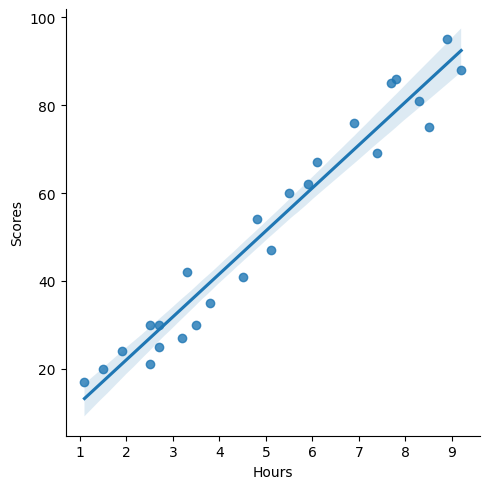

In [40]:
sns.lmplot(data=df,x='Hours',y='Scores')

plt.show()

### **From above plot we can see that data is almost linear in nature. So Linear Regression model will give best result.**

# **Plot 2 :  kdeplot (checking distribution of data points)**

In [41]:
df['Scores'].median()

47.0

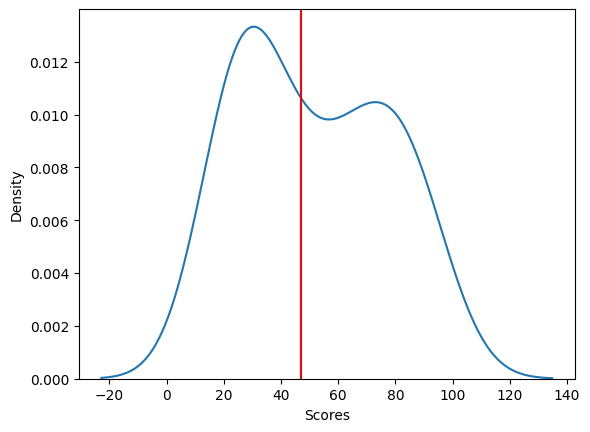

In [42]:
sns.kdeplot(data=df,x=df['Scores'])
plt.axvline(df['Scores'].median(),c='red')

### **From above kdeplot we can see that data is almost normally distributed.**

# **Plot 3 : Boxplot**

<Axes: >

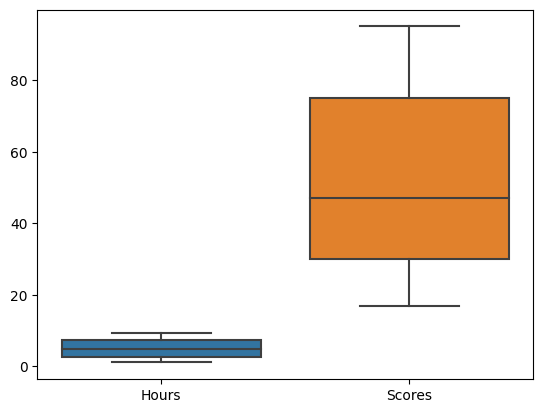

In [43]:
sns.boxplot(data=df)

### **From boxplot we can see that there is no any outlier present in given data.**

# **Model building**

## **1.Defining dependent and independent variables.**

In [44]:
# Dependent Variable:
X=df['Hours']

In [45]:
# independent Variable:
y=df['Scores']

## **2. Splitting data into Train and Test data.**

In [46]:
# Here test_size=0.2 means 20% data is train dataset, which is sufficient for model building
# Here I am using random_state=0 , by which data in train and test dataset remain same throughout.

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
# size of train data
print(f'The shape of X_train is {X_train.shape}') 

# size of test data
print(f'The shape of X_test is {X_test.shape}')   

The shape of X_train is (20,)
The shape of X_test is (5,)


In [48]:
X_train=(X_train.values.reshape(-1, 1))
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [49]:
X_test=(X_test.values.reshape(-1,1))
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

## **3.Using Linear Regression model.**

In [50]:
regressor=LinearRegression()

## **4.Training the model.**

In [51]:
regressor.fit(X_train,y_train)

LinearRegression()

In [52]:
# finding the intercept of model

print(f'The intercept is {regressor.intercept_}')

The intercept is 2.018160041434662


In [53]:
#finding the values of coefficients
print(f'The coefficient value of "Hours" parameter is {regressor.coef_}')

The coefficient value of "Hours" parameter is [9.91065648]


## **5.Prediction of train and test data**

In [54]:
# predicting the train data
y_train_pred=regressor.predict(X_train)
y_train_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [55]:
#predicting the test data
y_test_pred=regressor.predict(X_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## **6.Checking the accuracy and performance of model**

In [56]:
regressor.score(X_train,y_train)
print(f'The score for train data is {regressor.score(X_train,y_train)}')

The score for train data is 0.9515510725211552


In [57]:
regressor.score(X_test,y_test)
print(f'The score for test data is {regressor.score(X_test,y_test)}')

The score for test data is 0.9454906892105354


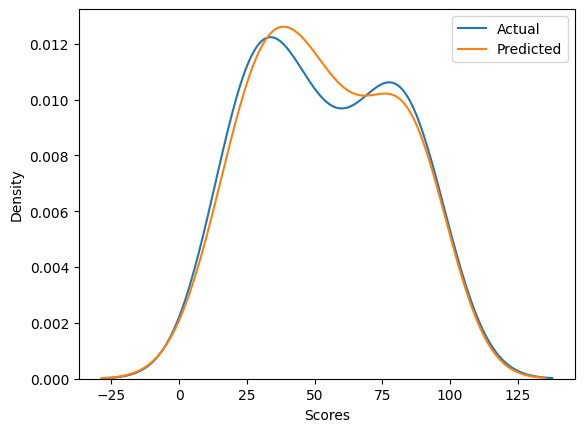

In [58]:
sns.kdeplot(data=y_train,label='Actual')
sns.kdeplot(data=y_train_pred,label='Predicted')

plt.legend()

### **Based on the scores of the train and test data, we observe that the model achieves an accuracy score of 95% and 94.5% respectively. This indicates that the model is well-suited for the given data, as there is neither underfitting nor overfitting.**

### **Additionally, upon examining the distplot above, we can observe that the line representing the Actual and Predicted values is very close, suggesting that the error is minimal.**

# **Prediction based on given input**

### **Que. What will be predicted score if a student studies for 9.25 hrs/ day?**

In [59]:
Hours=9.5
score=regressor.predict([[9.25]])

print(f'The predicted score if a student studies for 9.25 hrs/ day is {score[0]}')

The predicted score if a student studies for 9.25 hrs/ day is 93.69173248737539
